In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


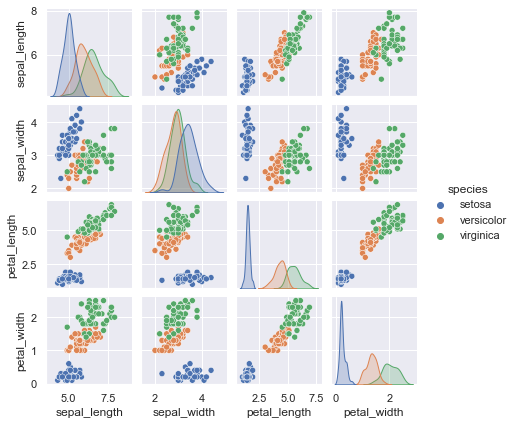

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height = 1.5)

In [9]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape


(150, 4)

In [10]:
y_iris = iris['species']
y_iris.shape

(150,)

# Supervised Learning Example: Linear Regression

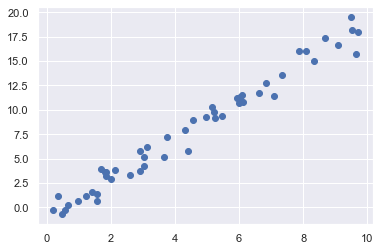

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#create example data to process and apply the methods of sci kit learn
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [19]:
X = x[:,]
X.shape

(50, 1)

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
model.coef_

array([1.9776566])

In [22]:
model.intercept_

-0.9033107255311164

In [23]:
xfit = np.linspace(-1, 11)

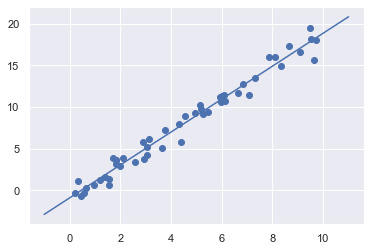

In [27]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit, yfit)

# Supervised Learning Example: Iris Classification

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)   

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Unsupervised Learning Example: Iris Dimensionality

In [32]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) 

/Users/dorukcinalioglu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


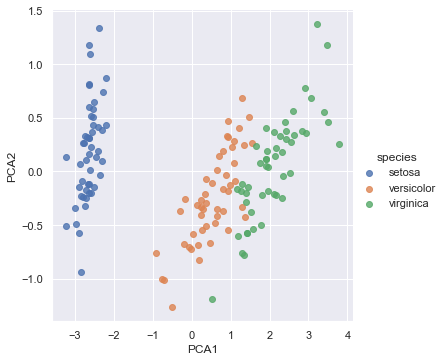

In [53]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

#notice that feautre decomposition - meaning seeing data in a lower-dimensional representation that retains the
#essential features of the data for the given classification problem!


/Users/dorukcinalioglu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


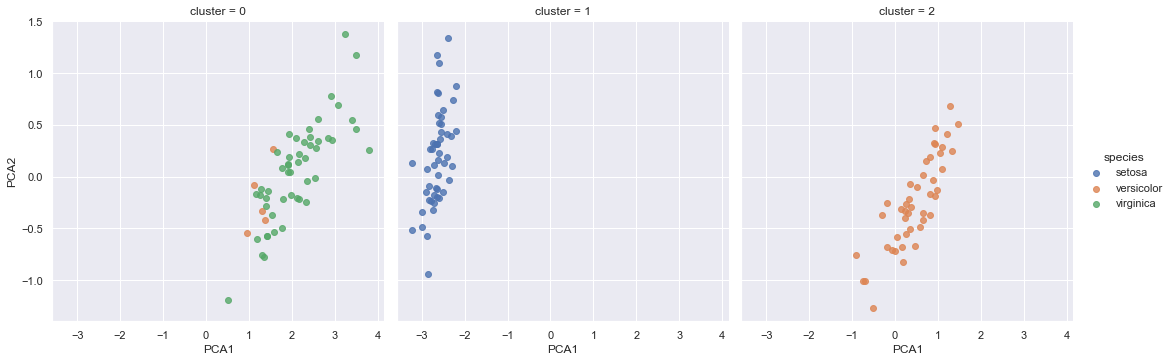

In [59]:
#Gaussian Mixture Model Clustering!

from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)    # 4. Determine cluster labels


iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

# sklearn naive bayes classification 

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

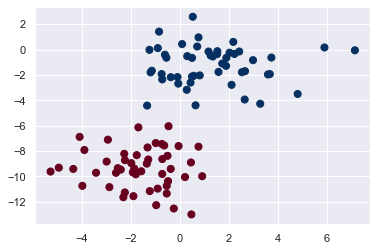

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [37]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

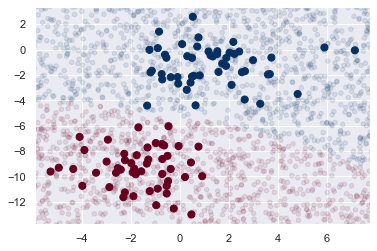

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [39]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# sklearn multinomial naive bayes classification

In [40]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [41]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [47]:
print(train.data[3])

From: revdak@netcom.com (D. Andrew Kille)
Subject: Re: Serbian genocide Work of God?
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 22

James Sledd (jsledd@ssdc.sas.upenn.edu) wrote:
: Are the Serbs doing the work of God?  Hmm...

: I've been wondering if anyone would ever ask the question,

: Are the governments of the United States and Europe not moving
: to end the ethnic cleansing by the Serbs because the targets are
: muslims?

: Can/Does God use those who are not following him to accomplish
: tasks for him?  Esp those tasks that are punative?

: James Sledd
: no cute sig....  but I'm working on it.

Are you suggesting that God supports genocide?
Perhaps the Germans were "punishing" Jews on God's behalf?

Any God who works that way is indescribably evil, and unworthy of
my worship or faith.

revdak@netcom.com



In [43]:
#what to do? we have to need a way of converting this text into a vector of numbers (feature vector for the ML model)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #a pipeline that attaches data into mnb classifier.

In [46]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

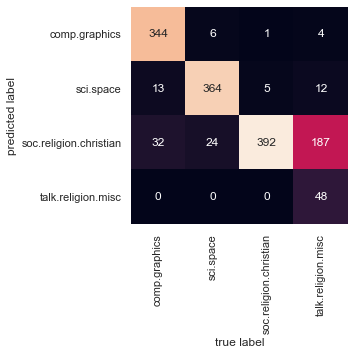

In [48]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [50]:
predict_category('sending a payload to the ISS')

'sci.space'

In [51]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [52]:
predict_category('determining the screen resolution')


'comp.graphics'

# Unsupervised Learning Example: Hand Written Digit Classification

In [60]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

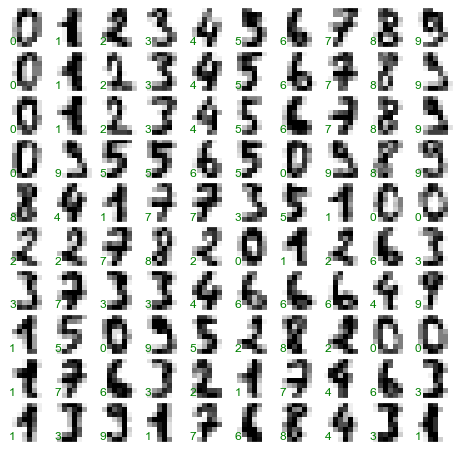

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [68]:
from sklearn.manifold import Isomap
import matplotlib.cm

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/Users/dorukcinalioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/dorukcinalioglu/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

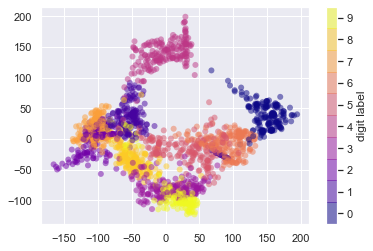

In [72]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('plasma', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [74]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

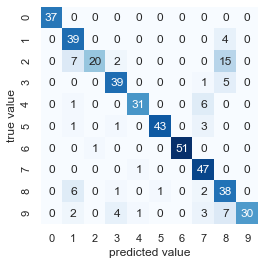

In [84]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

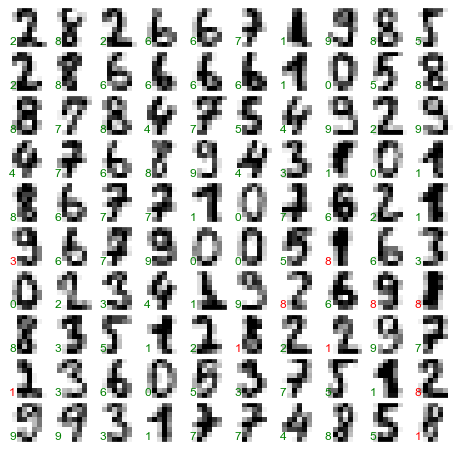

In [85]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')